In [21]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
df = pd.read_csv("./Datasets/df_player_avg/part-00000-750641be-de26-4467-8b33-e2f2167a5d2f-c000.csv")
df.columns.values

array(['season_year', 'teamName', 'personName', 'PER', 'MPG', 'PPG',
       'FGM_PG', 'FGA_PG', '3PM_PG', '3PA_PG', 'FTM_PG', 'FTA_PG', 'ORPG',
       'DRPG', 'RPG', 'APG', 'SPG', 'BPG', 'TOPG', 'PFPG', 'plusMinus_PG',
       'FG%', '3PT%', 'FT%', 'AST_TO', 'STL_TO', 'TOV_pct', 'USG_pct',
       'TS%'], dtype=object)

In [23]:
df.head()

,season_year,teamName,personName,PER,MPG,PPG,FGM_PG,FGA_PG,3PM_PG,3PA_PG,...,PFPG,plusMinus_PG,FG%,3PT%,FT%,AST_TO,STL_TO,TOV_pct,USG_pct,TS%
0,2023-24,76ers,Joel Embiid,37.65,2.76,2.85,0.95,1.79,0.11,0.29,...,0.24,0.56,0.529,0.388,0.883,1.460000,0.306667,12.501250,108.598219,0.644359
1,2023-24,Nuggets,Nikola Jokic,33.51,2.14,1.63,0.64,1.10,0.06,0.18,...,0.15,0.53,0.583,0.359,0.817,2.987342,0.455696,12.875397,113.784833,0.650051
2,2023-24,Bucks,Giannis Antetokounmpo,33.40,1.99,1.72,0.65,1.06,0.03,0.10,...,0.16,0.26,0.611,0.274,0.657,1.904000,0.348000,12.735090,111.091745,0.648539
3,2023-24,Thunder,Shai Gilgeous-Alexander,32.73,1.82,1.61,0.57,1.06,0.07,0.19,...,0.13,0.44,0.535,0.353,0.874,2.870370,0.925926,8.373997,103.476754,0.635804
4,2023-24,Mavericks,Luka Doncic,30.99,1.75,1.58,0.54,1.10,0.19,0.50,...,0.10,0.21,0.487,0.382,0.786,2.432624,0.351064,12.809332,102.753767,0.617342


In [24]:
df.iloc[4427]

season_year             2012-13
teamName               Warriors
personName      Andris Biedrins
PER                        7.42
MPG                       89.88
PPG                        4.36
FGM_PG                     1.81
FGA_PG                     3.81
3PM_PG                      0.0
3PA_PG                      0.0
FTM_PG                     0.73
FTA_PG                     2.36
ORPG                       6.17
DRPG                       21.6
RPG                       27.77
APG                        2.54
SPG                        2.72
BPG                        7.62
TOPG                       2.54
PFPG                      18.33
plusMinus_PG             -13.61
FG%                       0.476
3PT%                        0.0
FT%                       0.308
AST_TO                      1.0
STL_TO                 1.071429
TOV_pct               34.381139
USG_pct              605.952381
TS%                    0.449102
Name: 4427, dtype: object

In [43]:
dataset = df[['PER', 'MPG', 'PPG',
       'FGM_PG', 'FGA_PG', '3PM_PG', '3PA_PG', 'FTM_PG', 'FTA_PG', 'ORPG',
       'DRPG', 'RPG', 'APG', 'SPG', 'BPG', 'TOPG', 'PFPG', 'plusMinus_PG',
       'FG%', '3PT%', 'FT%','AST_TO', 'STL_TO', 'TOV_pct', 'USG_pct',
       'TS%' ]].drop(index=[4427, 1324,1762, 1761,1760])

In [58]:
dataset_brut = df[['PER', 'MPG', 'PPG',
       'FGM_PG', 'FGA_PG', 'ORPG',
       'DRPG', 'BPG', 'PFPG', 'plusMinus_PG','AST_TO', 'STL_TO', 'TOV_pct', 'USG_pct',
       'TS%' ]]

In [44]:
dataset.describe()


,PER,MPG,PPG,FGM_PG,FGA_PG,3PM_PG,3PA_PG,FTM_PG,FTA_PG,ORPG,...,PFPG,plusMinus_PG,FG%,3PT%,FT%,AST_TO,STL_TO,TOV_pct,USG_pct,TS%
count,5160.000000,5160.000000,5160.000000,5160.000000,5160.000000,5160.000000,5160.000000,5160.000000,5160.000000,5160.000000,...,5160.000000,5160.000000,5160.000000,5160.000000,5160.000000,5160.000000,5160.000000,5160.000000,5160.000000,5160.000000
mean,13.903353,4.507888,1.666283,0.628335,1.363295,0.151045,0.430890,0.258446,0.355159,0.236176,...,0.422798,-0.090537,0.458444,0.295577,0.748488,1.670679,0.650073,12.762591,115.774194,0.547376
std,4.645804,2.381068,0.484990,0.207493,0.343057,0.121235,0.323046,0.136769,0.211957,0.305523,...,0.350752,0.687447,0.069355,0.140882,0.113859,0.814071,0.358294,3.969878,20.052107,0.056913
min,0.700000,1.310000,0.580000,0.210000,0.820000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.050000,-9.850000,0.204000,0.000000,0.000000,0.090909,0.000000,2.495425,100.000000,0.254929
25%,10.707500,3.090000,1.340000,0.490000,1.120000,0.050000,0.170000,0.160000,0.220000,0.060000,...,0.230000,-0.400000,0.414000,0.267000,0.690000,1.079405,0.413793,10.057474,104.289947,0.512248
50%,13.330000,3.970000,1.550000,0.580000,1.270000,0.140000,0.420000,0.230000,0.310000,0.130000,...,0.330000,-0.040000,0.448000,0.337000,0.769000,1.564476,0.567898,12.271612,108.677926,0.547454
75%,16.470000,5.270000,1.880000,0.710000,1.530000,0.230000,0.620000,0.320000,0.430000,0.290000,...,0.510000,0.270000,0.492000,0.377000,0.828000,2.125000,0.792615,14.946215,119.894909,0.583333
max,37.650000,47.970000,7.440000,3.060000,4.680000,0.690000,2.060000,1.320000,2.840000,5.470000,...,7.000000,6.570000,0.819000,1.000000,1.000000,8.200000,5.625000,35.477767,472.023810,0.780428


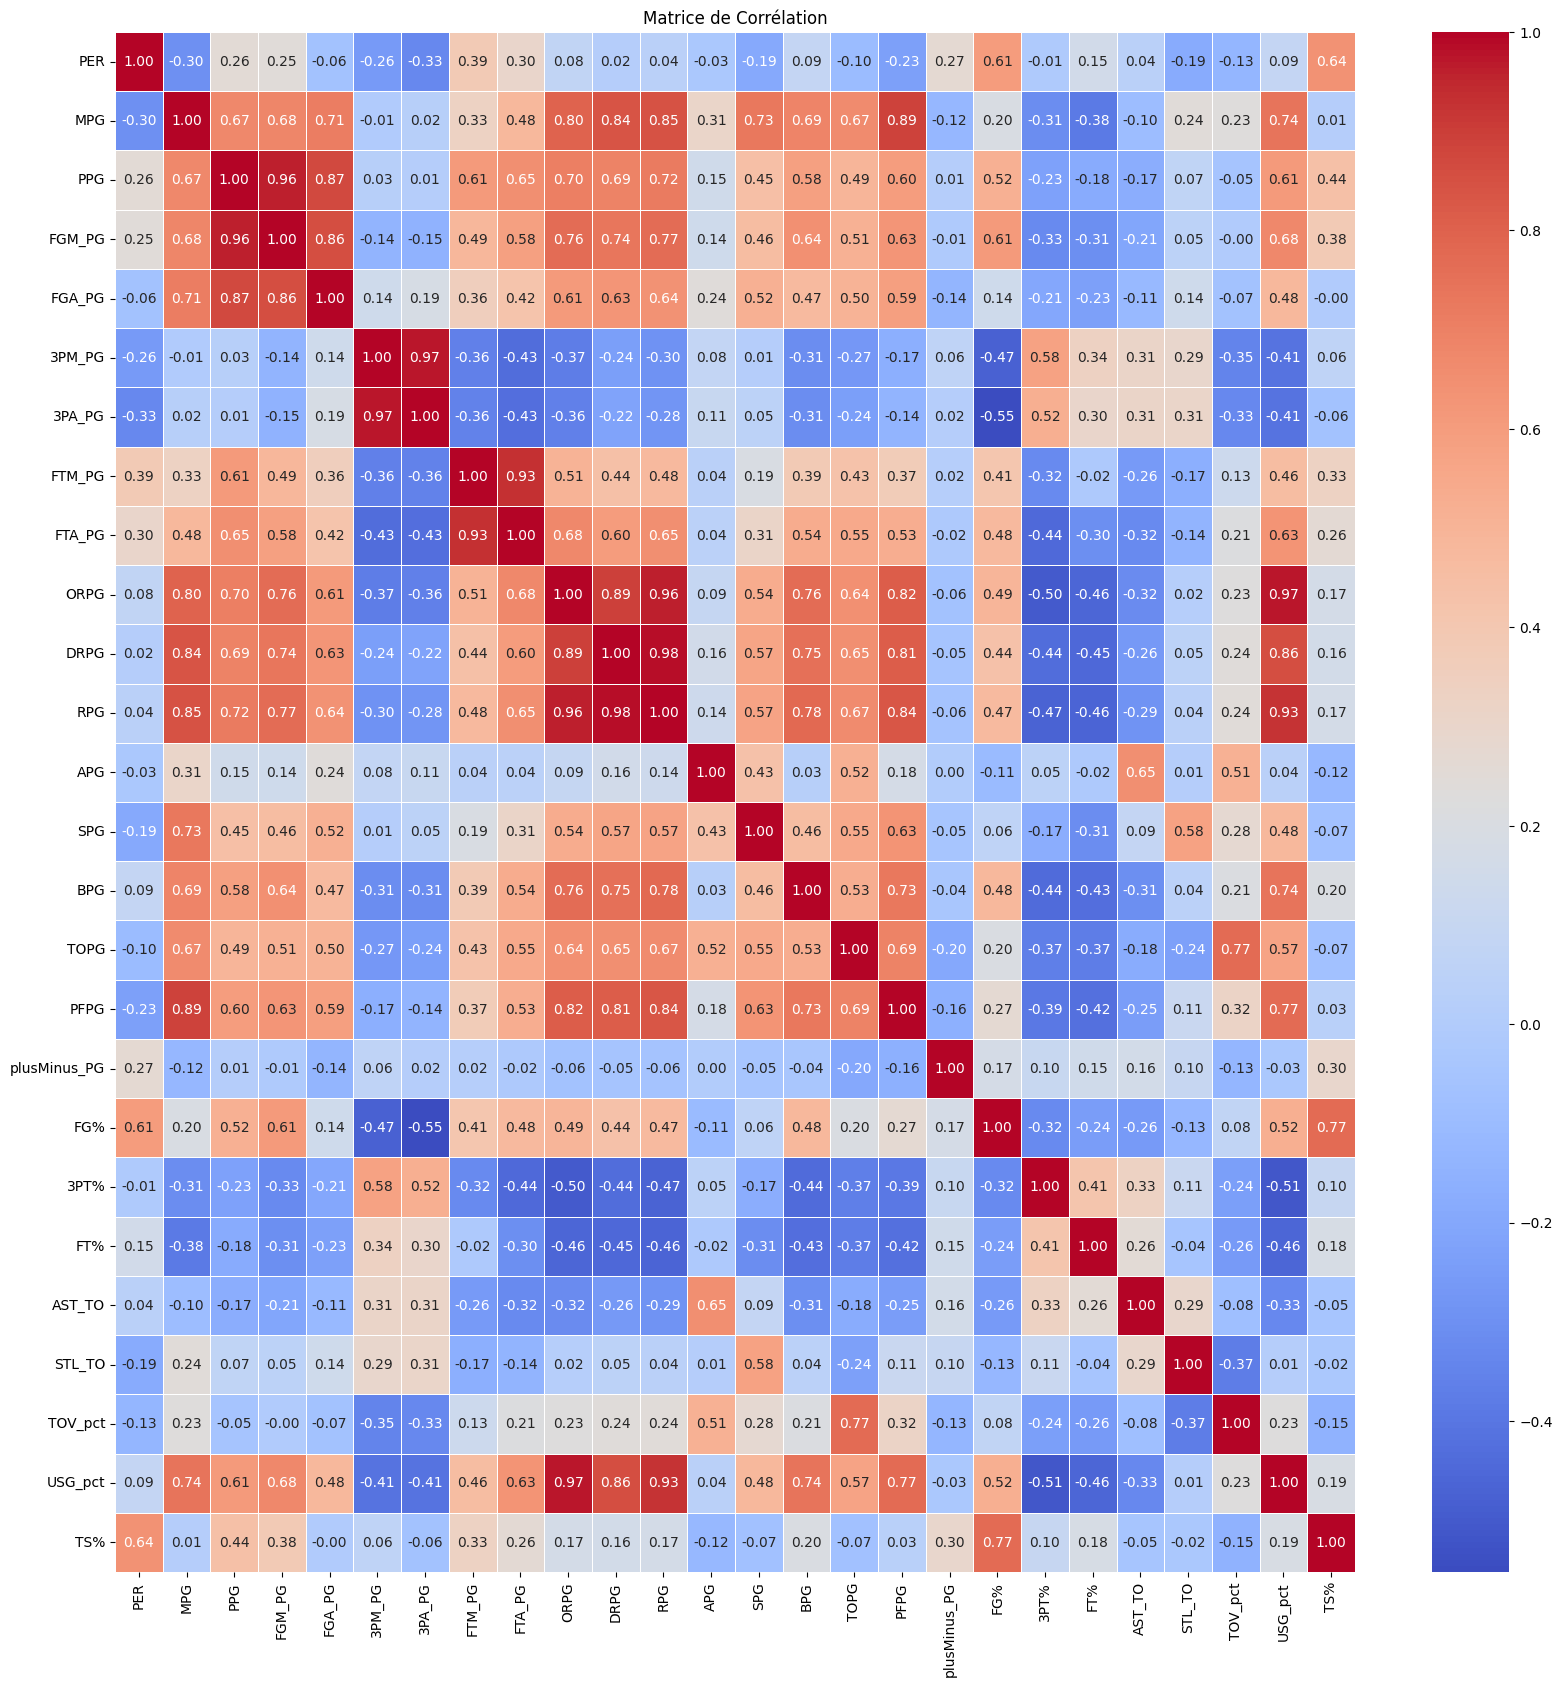

In [45]:
correlation_matrix = dataset.corr()
plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Matrice de Corrélation')
plt.show()

In [48]:
dataset_standarded = StandardScaler().fit_transform(dataset)


In [51]:
pca = PCA(n_components=5)

PCA_dimensions = pca.fit(dataset_standarded)
print(PCA_dimensions.explained_variance_ratio_)

[0.40856663 0.14169375 0.1122087  0.07541372 0.05537031]


In [52]:
PCA_dimensions.explained_variance_ratio_


array([0.40856663, 0.14169375, 0.1122087 , 0.07541372, 0.05537031])

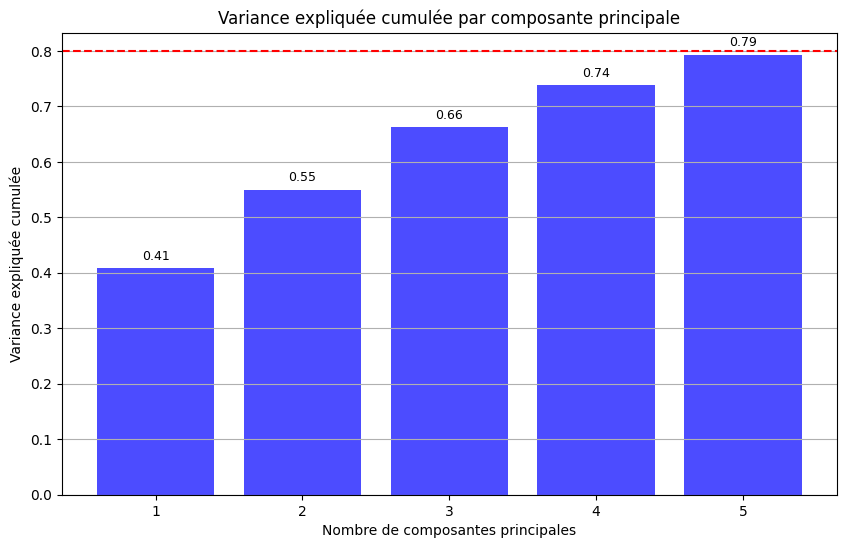

In [53]:
variance_explained = pca.explained_variance_ratio_
variance_explained_cumulative = np.cumsum(variance_explained)

# Création du graphique de la variance expliquée cumulée
plt.figure(figsize=(10, 6))
bars = plt.bar(range(1, len(variance_explained_cumulative) + 1), 
       variance_explained_cumulative, 
       alpha=0.7, 
       color='b')

for i, bar in enumerate(bars):
    plt.text(bar.get_x() + bar.get_width()/2, 
            bar.get_height() + 0.01, 
            f'{variance_explained_cumulative[i]:.2f}', 
            ha='center', va='bottom',
            fontsize=9)

plt.grid(True, axis='y')
plt.xlabel('Nombre de composantes principales')
plt.ylabel('Variance expliquée cumulée')
plt.title('Variance expliquée cumulée par composante principale')

# Ligne horizontale à 0.8 (80%) pour aider à la décision
plt.axhline(y=0.8, color='r', linestyle='--', label='Seuil de 80%')

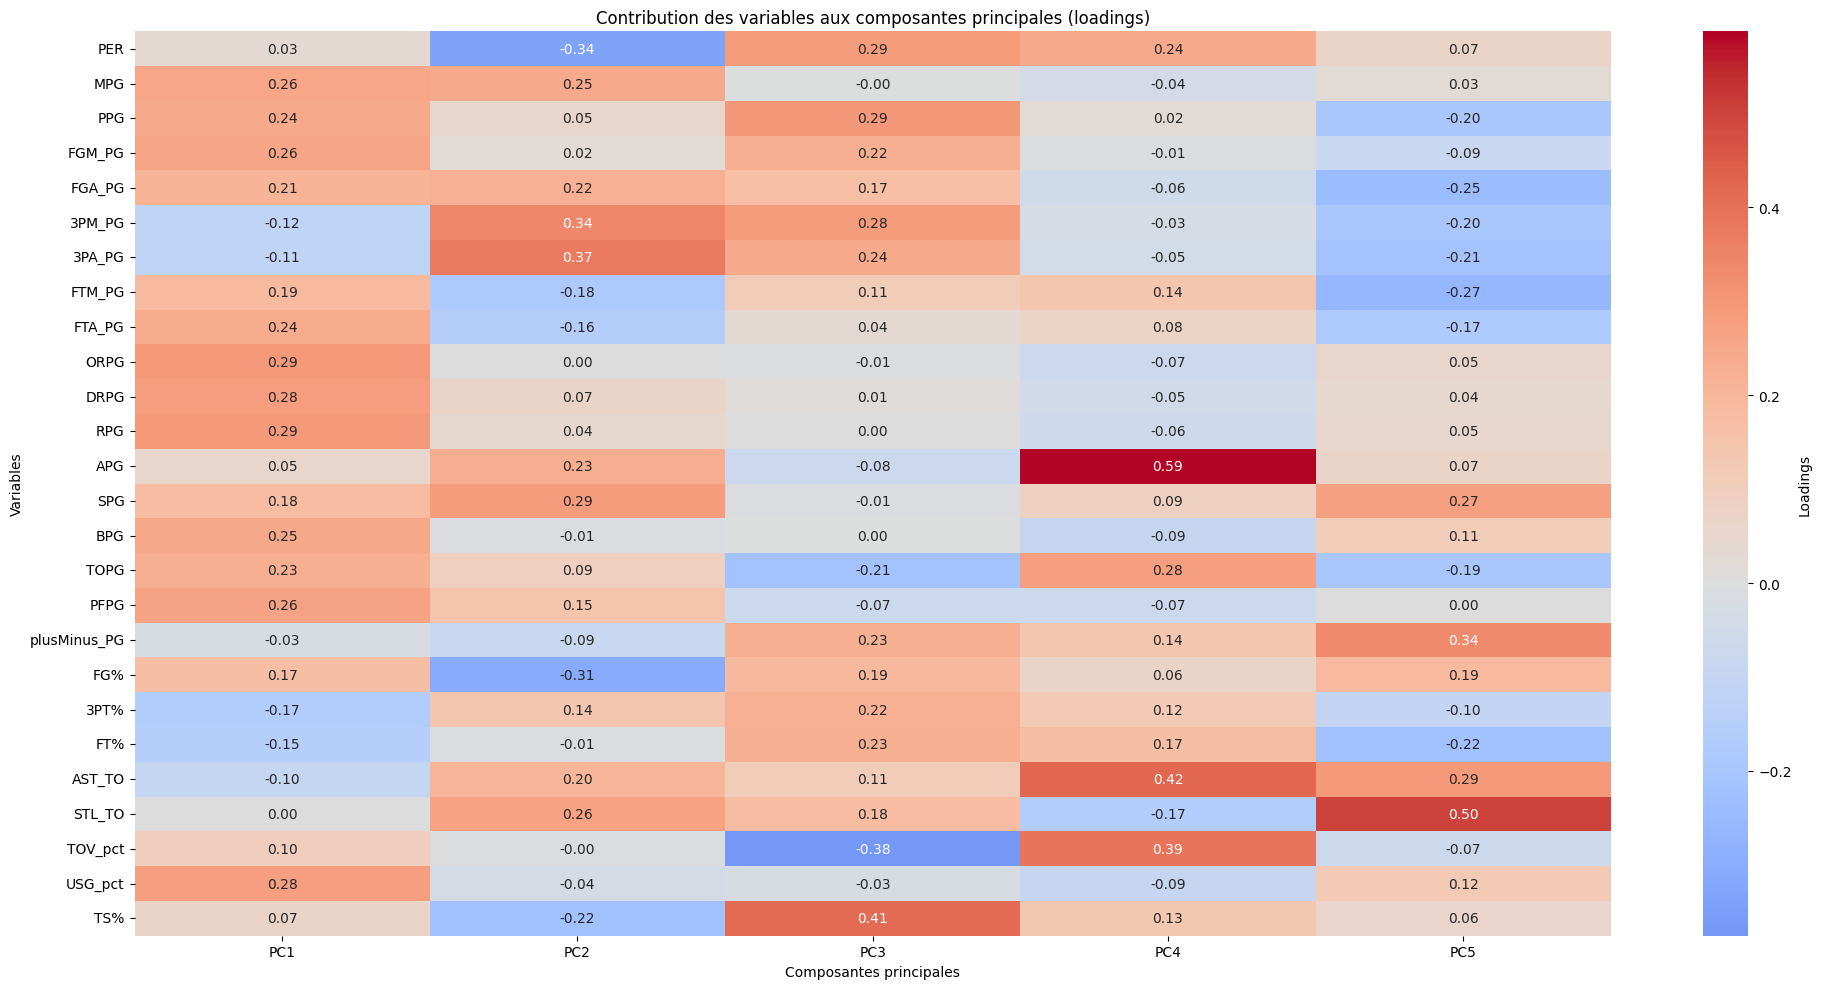

In [54]:
loadings = pd.DataFrame(
    pca.components_.T,
    index=dataset.columns,
    columns=[f'PC{i+1}' for i in range(pca.n_components_)]
)

# Créer la heatmap avec les loadings directement (avec signe + ou -)
plt.figure(figsize=(20, 10))
sns.heatmap(loadings, annot=True, cmap="coolwarm", fmt=".2f", center=0,
            cbar_kws={'label': 'Loadings'})
plt.title("Contribution des variables aux composantes principales (loadings)")
plt.ylabel("Variables")
plt.xlabel("Composantes principales")
plt.tight_layout()
plt.show()

In [55]:
pca_scores = pca.transform(dataset_standarded)

In [34]:
inertia = []
for k in range(1, 50):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(pca_scores)
    inertia.append(kmeans.inertia_)

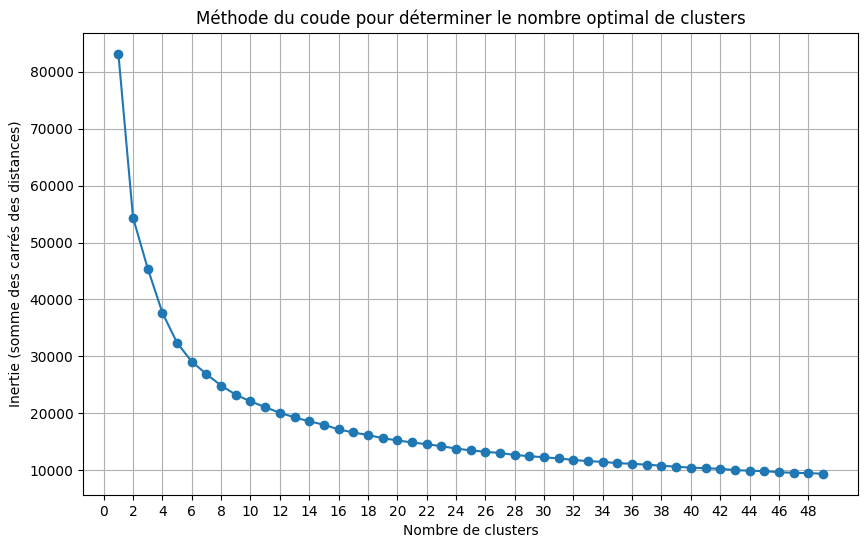

In [35]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, 50), inertia, marker='o')
plt.xlabel('Nombre de clusters')
plt.xticks(range(0,len(inertia),2))
plt.ylabel('Inertie (somme des carrés des distances)')
plt.title("Méthode du coude pour déterminer le nombre optimal de clusters")
plt.grid(True)
plt.show()

In [36]:
kmeans = KMeans(n_clusters=4, random_state=42)
labels = kmeans.fit_predict(pca_scores)

In [56]:
for i in range(4,15):
    kmeans = KMeans(n_clusters=i, random_state=42)
    labels = kmeans.fit_predict(pca_scores)
    silhouette_avg = silhouette_score(pca_scores, labels)
    print(f"Pour {i} clusters, le score de silhouette est : {silhouette_avg:.4f}")


Pour 4 clusters, le score de silhouette est : 0.2391
Pour 5 clusters, le score de silhouette est : 0.2041
Pour 6 clusters, le score de silhouette est : 0.2101
Pour 7 clusters, le score de silhouette est : 0.1793
Pour 8 clusters, le score de silhouette est : 0.1644
Pour 9 clusters, le score de silhouette est : 0.1701
Pour 10 clusters, le score de silhouette est : 0.1692
Pour 11 clusters, le score de silhouette est : 0.1664
Pour 12 clusters, le score de silhouette est : 0.1666
Pour 13 clusters, le score de silhouette est : 0.1649
Pour 14 clusters, le score de silhouette est : 0.1719


In [59]:
for i in range(4,10):
    kmeans = KMeans(n_clusters=i, random_state=42)
    labels = kmeans.fit_predict(dataset_brut)
    silhouette_avg = silhouette_score(dataset_brut, labels)
    print(f"Pour {i} clusters, le score de silhouette est : {silhouette_avg:.4f}")


Pour 4 clusters, le score de silhouette est : 0.5406
Pour 5 clusters, le score de silhouette est : 0.4395
Pour 6 clusters, le score de silhouette est : 0.2826
Pour 7 clusters, le score de silhouette est : 0.2834
Pour 8 clusters, le score de silhouette est : 0.2777
Pour 9 clusters, le score de silhouette est : 0.2775


In [39]:
df_clusters = df.loc[dataset.index].copy()
df_clusters['PCA1'] = pca_scores[:, 0]
df_clusters['PCA2'] = pca_scores[:, 1]
df_clusters['PCA3'] = pca_scores[:, 2]
df_clusters['cluster'] = labels

In [63]:
df_clusters = df.loc[dataset_brut.index].copy()
df_clusters['cluster'] = labels

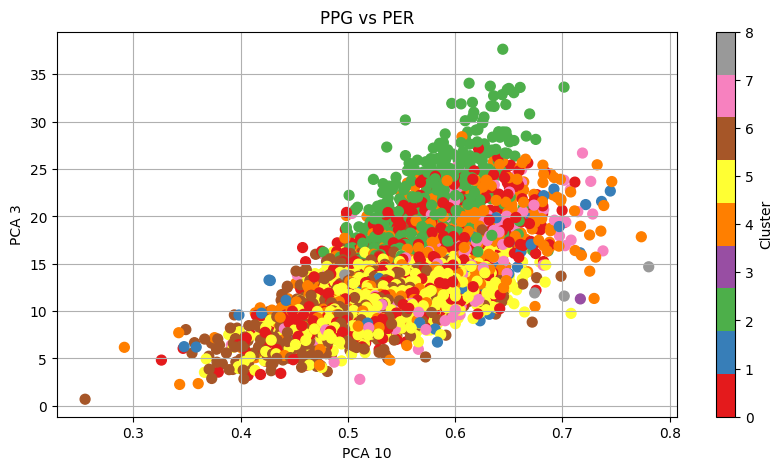

In [65]:
plt.figure(figsize=(10, 5))
plt.scatter(df_clusters['TS%'], df_clusters['PER'], c=df_clusters['cluster'], cmap='Set1', s=50)
plt.title("PPG vs PER")
plt.xlabel(f"PCA {i+1}")
plt.ylabel(f"PCA {j+1}")
plt.grid(True)
plt.colorbar(label="Cluster")
plt.show()

In [40]:
distances = np.linalg.norm(pca_scores, axis=1)
threshold = np.percentile(distances, 98)  # ou Q3 + 1.5*IQR
mask = distances < threshold

print(distances)

outlier_index = np.argmax(distances)
print("Index outlier :", outlier_index)

# Filtrer le DataFrame
print(dataset.iloc[outlier_index])


[7.7802881  4.35888405 4.93881344 ... 5.99274468 3.26783459 4.86522718]
Index outlier : 1760
PER             11.290
MPG             47.970
PPG              7.440
FGM_PG           3.060
FGA_PG           3.940
3PM_PG           0.000
3PA_PG           0.000
FTM_PG           1.310
FTA_PG           2.840
ORPG             5.470
DRPG             8.970
RPG             14.440
APG              1.310
SPG              1.310
BPG              1.750
TOPG             1.750
PFPG             7.000
plusMinus_PG     6.570
FG%              0.778
3PT%             0.000
FT%              0.462
Name: 1763, dtype: float64


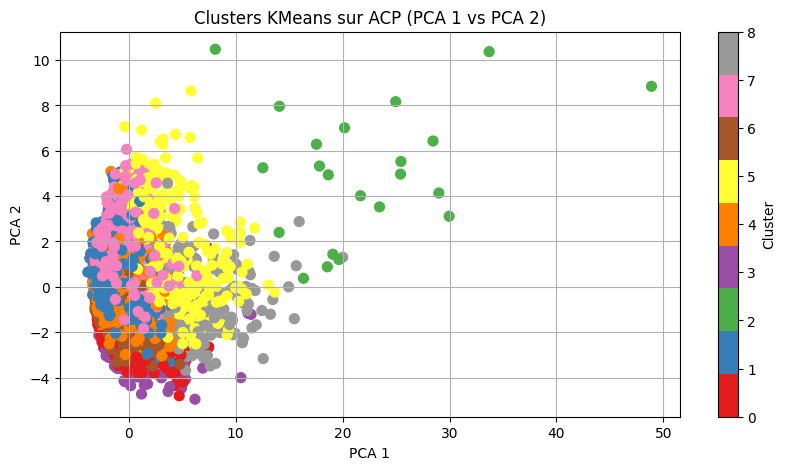

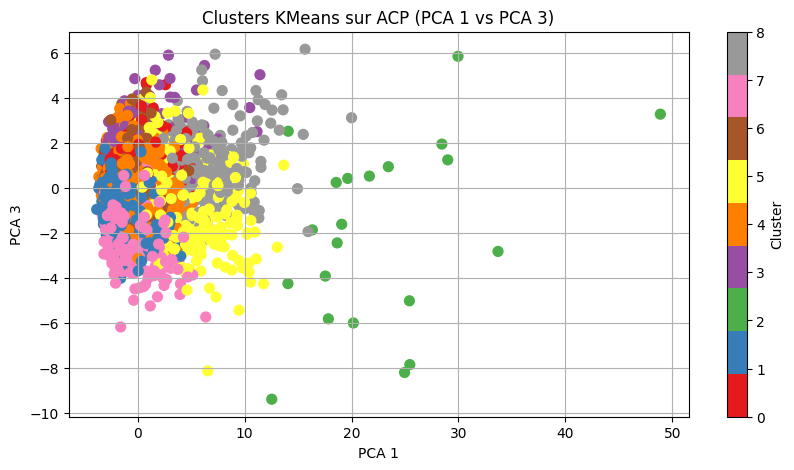

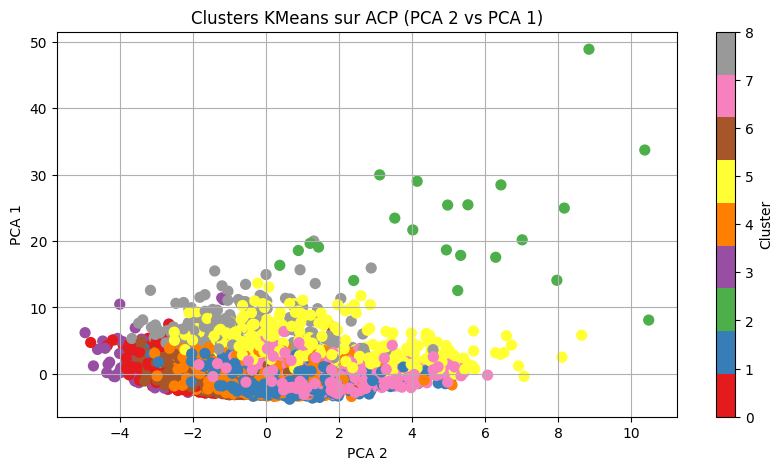

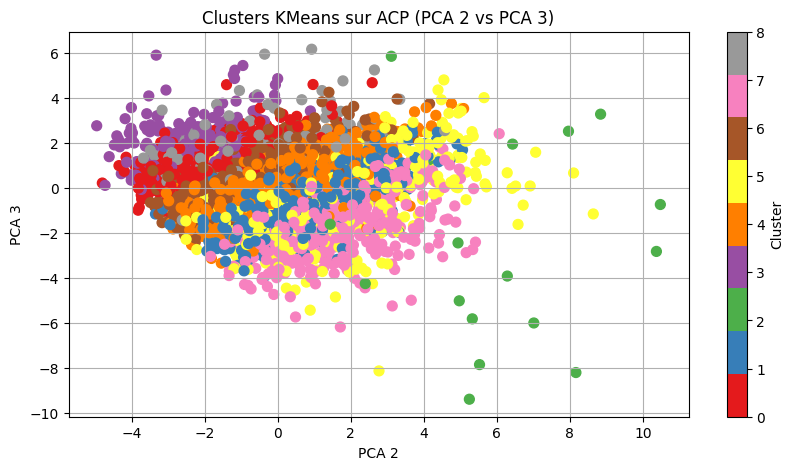

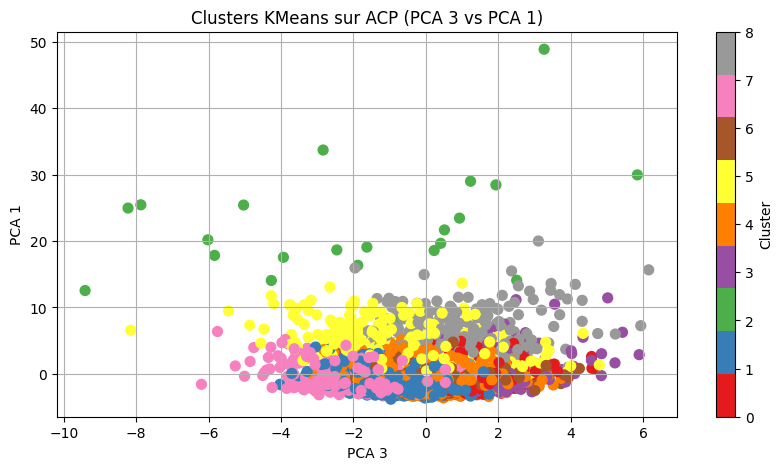

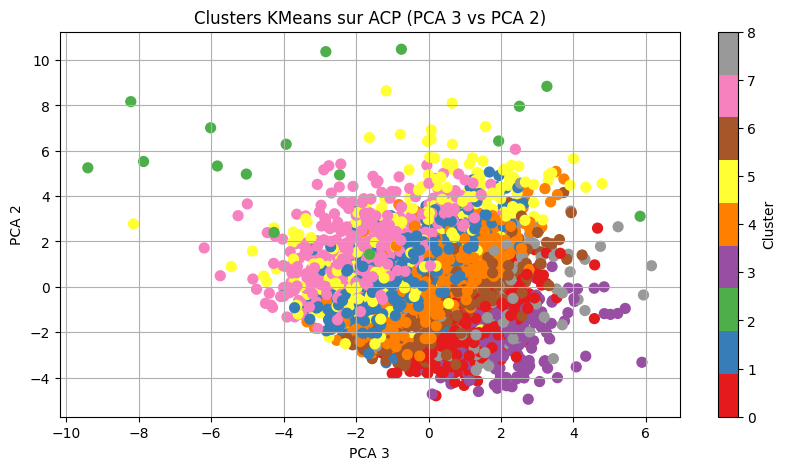

In [41]:
for i in range(3):
    for j in range(3):
        if i != j:
            plt.figure(figsize=(10, 5))
            plt.scatter(df_clusters[f'PCA{i+1}'], df_clusters[f'PCA{j+1}'], c=df_clusters['cluster'], cmap='Set1', s=50)
            plt.title(f"Clusters KMeans sur ACP (PCA {i+1} vs PCA {j+1})")
            plt.xlabel(f"PCA {i+1}")
            plt.ylabel(f"PCA {j+1}")
            plt.grid(True)
            plt.colorbar(label="Cluster")
            plt.show()

In [340]:


silhouette_avg = silhouette_score(pca_scores, labels)
print(f"Le coefficient de silhouette est : {silhouette_avg}")

Le coefficient de silhouette est : 0.023013050461380663


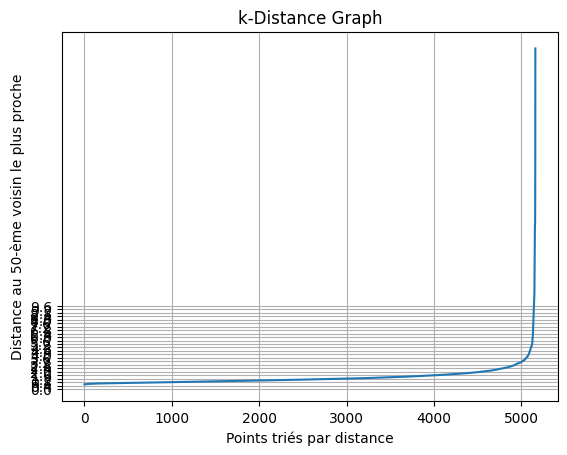

: 

In [ ]:
from sklearn.neighbors import NearestNeighbors


k = 50

# Calculer les distances aux k-voisins
neigh = NearestNeighbors(n_neighbors=k)
nbrs = neigh.fit(pca_scores)
distances, indices = nbrs.kneighbors(pca_scores)

# Trier les distances
distances = np.sort(distances[:, k-1], axis=0)

# Tracer le graphique des distances
plt.plot(distances)
plt.xlabel('Points triés par distance')
plt.ylabel(f'Distance au {k}-ème voisin le plus proche')
plt.yticks(np.arange(0,10,0.4))
plt.grid(True)
plt.title('k-Distance Graph')
plt.show()

In [342]:
from sklearn.cluster import DBSCAN

max_score = {"eps": -1 , "min_sample": -1, "score": -1}

for i in np.arange(1.6,2.4,0.1):
    for j in range(50, 150, 10):
        dbscan = DBSCAN(eps=i, min_samples=j, metric='euclidean')
        cluster_labels = dbscan.fit_predict(pca_scores)
        if len(set(cluster_labels)) > 1:
            silhouette_avg = silhouette_score(pca_scores, cluster_labels)
            max_score = {"eps": i , "min_sample": j, "score": max(max_score['score'], silhouette_avg)}    
            print(f"eps: {i}, min_samples: {j}, silhouette_score: {silhouette_avg}")
        
print(max_score)


eps: 1.6, min_samples: 50, silhouette_score: 0.5003542843640906
eps: 1.6, min_samples: 60, silhouette_score: 0.4870339779746821
eps: 1.6, min_samples: 70, silhouette_score: 0.4783525169750867
eps: 1.6, min_samples: 80, silhouette_score: 0.46745697137222236
eps: 1.6, min_samples: 90, silhouette_score: 0.45717866461342765
eps: 1.6, min_samples: 100, silhouette_score: 0.4482086240521615
eps: 1.6, min_samples: 110, silhouette_score: 0.43904792650258484
eps: 1.6, min_samples: 120, silhouette_score: 0.4328008419569701
eps: 1.6, min_samples: 130, silhouette_score: 0.42942419605442683
eps: 1.6, min_samples: 140, silhouette_score: 0.42212693643535343
eps: 1.7000000000000002, min_samples: 50, silhouette_score: 0.5301655164294858
eps: 1.7000000000000002, min_samples: 60, silhouette_score: 0.5164913965684338
eps: 1.7000000000000002, min_samples: 70, silhouette_score: 0.5013338964636542
eps: 1.7000000000000002, min_samples: 80, silhouette_score: 0.4928788500834641
eps: 1.7000000000000002, min_sampl

: 

: 

In [ ]:
dbscan = DBSCAN(eps=2.3, min_samples=140, metric='euclidean')
cluster_labels = dbscan.fit_predict(pca_scores)

In [ ]:

df_clusters_db_scan = df.loc[dataset.index].copy()
df_clusters_db_scan['PCA1'] = pca_scores[:, 0]
df_clusters_db_scan['PCA2'] = pca_scores[:, 1]
df_clusters_db_scan['PCA3'] = pca_scores[:, 2]
df_clusters_db_scan['PCA4'] = pca_scores[:, 3]
df_clusters_db_scan['cluster'] = cluster_labels

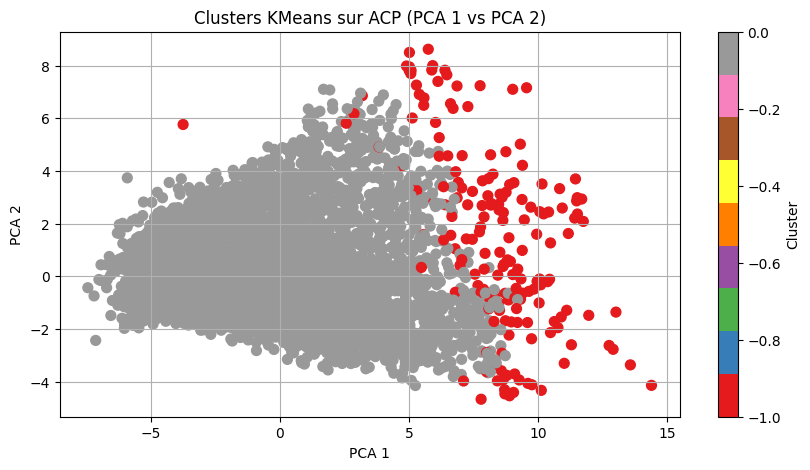

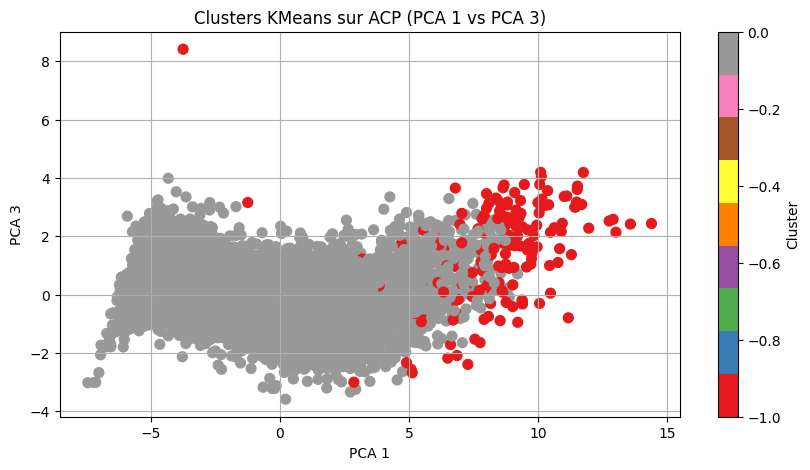

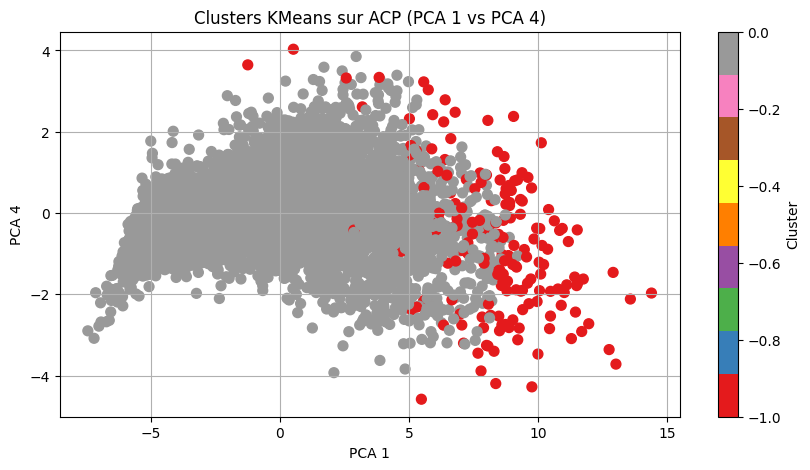

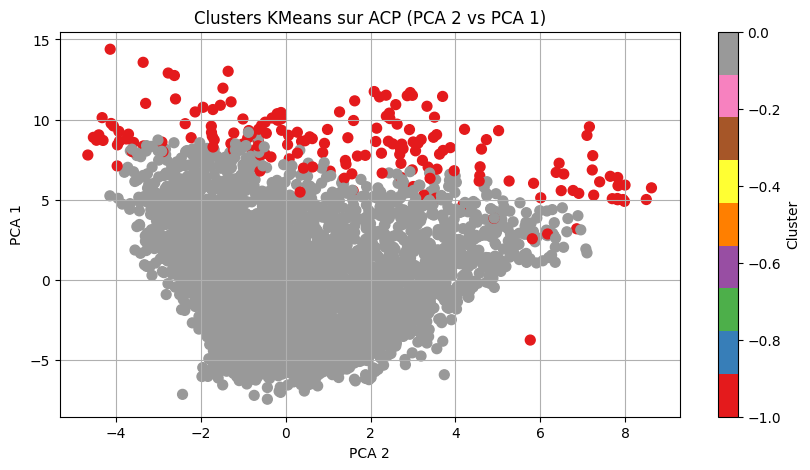

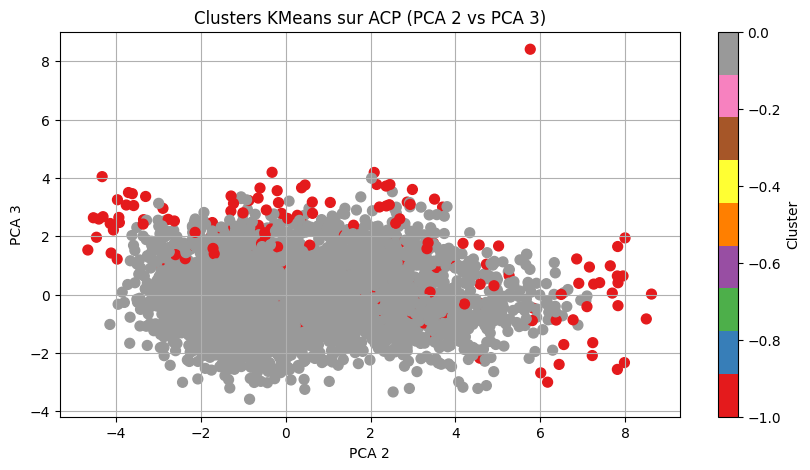

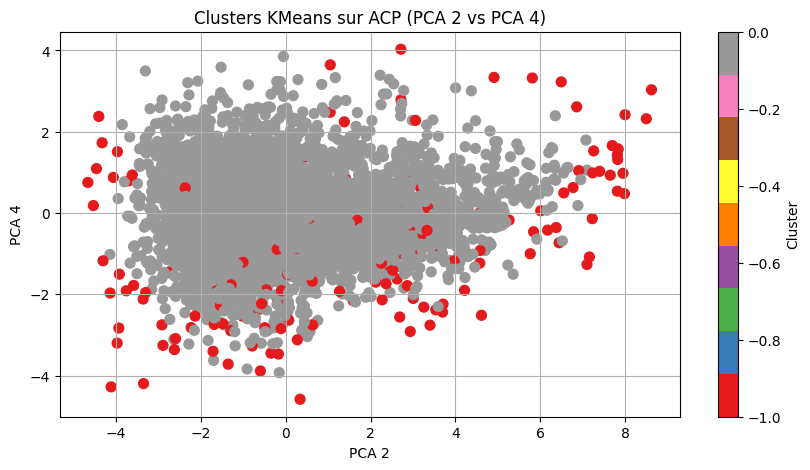

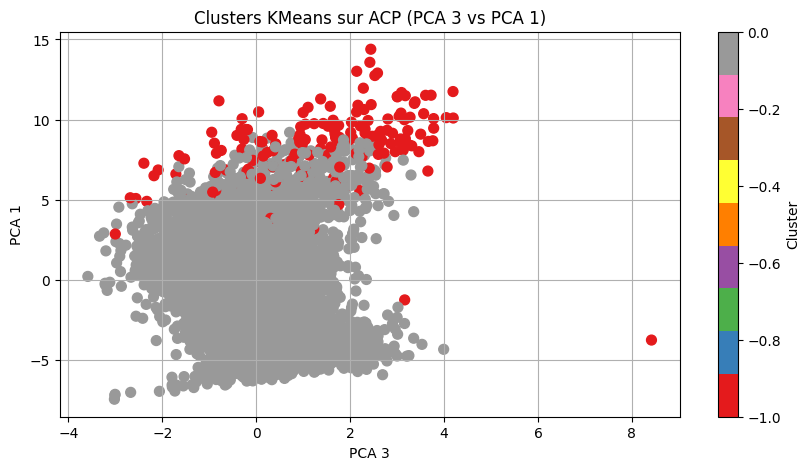

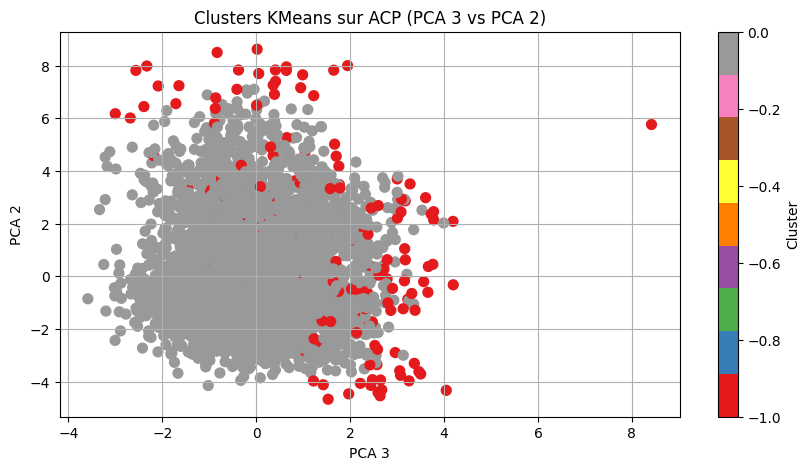

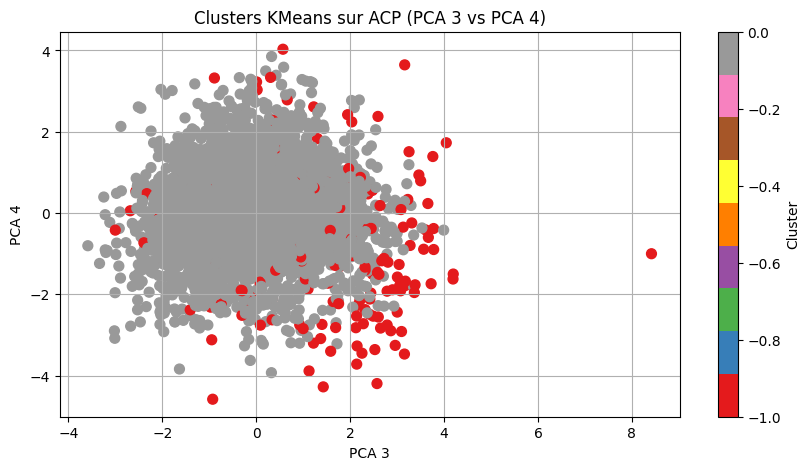

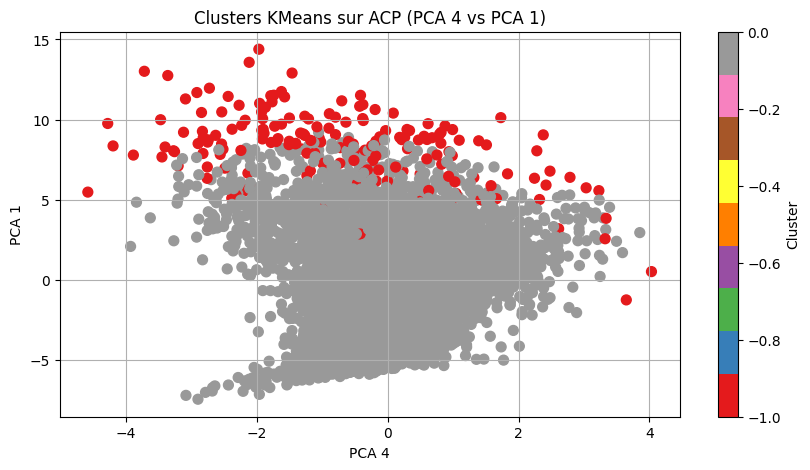

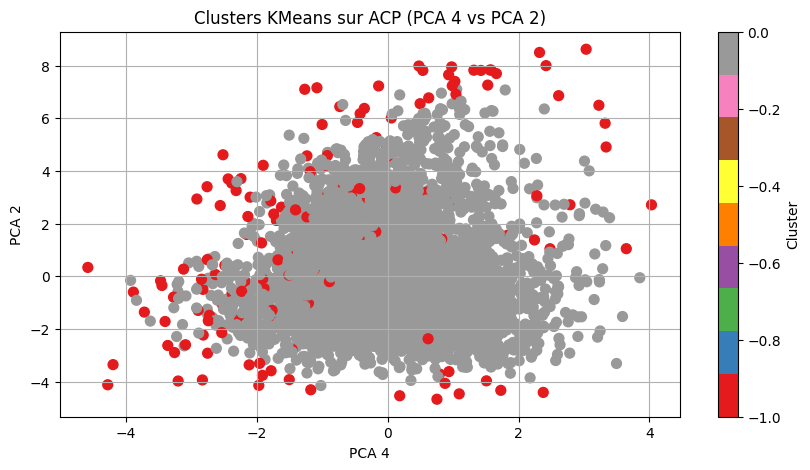

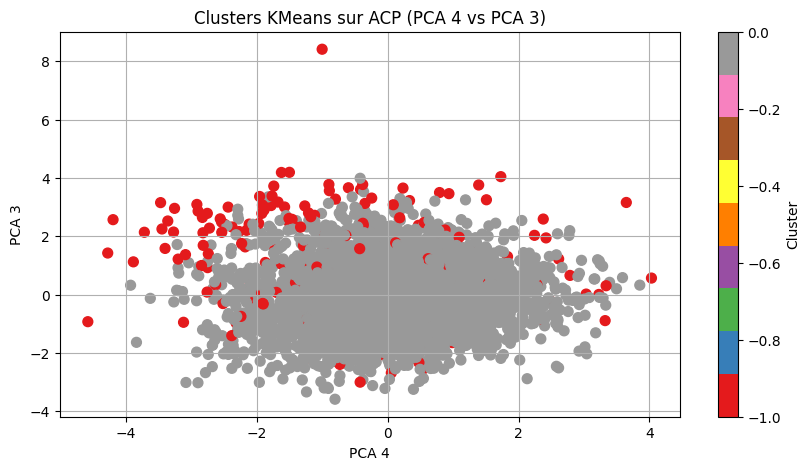

In [ ]:
for i in range(4):
    for j in range(4):
        if i != j:
            plt.figure(figsize=(10, 5))
            plt.scatter(df_clusters_db_scan[f'PCA{i+1}'], df_clusters_db_scan[f'PCA{j+1}'], c=df_clusters_db_scan['cluster'], cmap='Set1', s=50)
            plt.title(f"Clusters KMeans sur ACP (PCA {i+1} vs PCA {j+1})")
            plt.xlabel(f"PCA {i+1}")
            plt.ylabel(f"PCA {j+1}")
            plt.grid(True)
            plt.colorbar(label="Cluster")
            plt.show()